В этой программе будет использоваться ранее написанный декодер для LDPC кодов. Будут получены гистограммы для C и V узлов кода (3, 6) на разных итерациях 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from math import e, log
import pandas as pd
from sklearn import datasets

In [2]:
size_of_sample = 100
max_l = 100
l = 0
H = np.array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], 
             [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], 
             [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
             [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
             [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
             [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]])

In [3]:
def dc_update(L_j_i):
    L_i_j = [[0 for i in range(12)] for j in range(6)]
    for i in range(len(L_i_j)):
        for j in range(len(L_i_j[0])):
            tmp = 1
            for k in range(len(L_i_j[0])):
                if (k != j ):
                    if (H[i][k]):
                        tmp *= np.tanh(L_j_i[k][i] / 2)
            L_i_j[i][j] = 2 * np.arctanh(tmp)
    return L_i_j

In [4]:
def dv_update(L_i_j, L_j_i, L_j):
    for i in range(len(L_j_i)):
        for j in range(len(L_j_i[0])):
            tmp = L_j[i]
            for k in range(len(L_j_i[0])):
                if (k != j):
                    if (H[k][i]):
                        tmp += L_i_j[k][i]
            L_j_i[i][j] = tmp
    return L_j_i

In [5]:
def stop_kriteria(L_j_i, L_i_j, L_j, H, l):
    mv = np.zeros(12)
    for j in range(len(L_j_i)):
        tmp = 0
        for i in range(len(L_i_j)):
            tmp += L_i_j[i][j]
        if (tmp + L_j[j] < 0):
            mv[j] = 1
        else:
            mv[j] = 0
    if (np.dot(mv, H.T).all() == 0):
        #print("got_it\n")
        #print(mv)
        #print(l)
        return True
    elif (l == max_l):
        #print("max_iter_reach")
        return False
    return 4

In [6]:
def iteration_of_sample(sigma):
    nu = np.random.normal(0, sigma, 12)
    l = 0
    x= np.random.randint(0,2,12)
    v = [-1 if (i == 1) else 1 for i in x]
    y = [v[i] + nu[i] for i in range(12)]
    L_j = [2 * i / (sigma ** 2) for i in y]
    L_j_i = [[L_j[j] if H[i][j] == 1 else 0 for i in range(6)] for j in range(12)]
    L_i_j = [[0 for i in range(12)] for j in range(6)]
    while True:
        L_i_j = dc_update(L_j_i)
        L_j_i = dv_update(L_i_j, L_j_i, L_j)
        l += 1
        if (stop_kriteria(L_j_i, L_i_j, L_j, H, l) != 4):
            break
    return l
    

L_ans - двойной массив, 10x100, для $\sigma_1, \sigma_2, \dots \sigma_10$, значение $L[i][j]$ - количесто кодов, с количеством итераций = j

In [7]:
L_ans = [[0 for j in range(100)] for i in range(9)]
sigmas = [0.001, 0.1, 0.5, 0.9, 1, 1.5, 2, 4, 8]
for j in range(len(sigmas)):
    i = 0
    while (i < size_of_sample):
        l = iteration_of_sample(sigmas[j])
        L_ans[j][l - 1] += 1
        i += 1
L_ans

/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_77910/4021598895.py:10: RuntimeWarning: divide by zero encountered in arctanh
  L_i_j[i][j] = 2 * np.arctanh(tmp)
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_77910/3400298976.py:8: RuntimeWarning: invalid value encountered in double_scalars
  tmp += L_i_j[k][i]
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_77910/297629177.py:6: RuntimeWarning: invalid value encountered in double_scalars
  tmp += L_i_j[i][j]


[[97,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3],
 [98,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

Text(0.5, 1.0, 'sigma = 0.5')

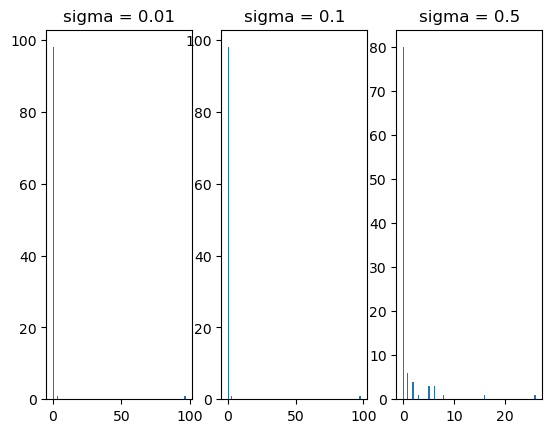

In [8]:
fig, axs= plt.subplots(1, 3)
n_bins =100
axs[0].hist(L_ans[0], bins=n_bins)
axs[0].set_title('sigma = 0.01')
axs[1].hist(L_ans[1], bins=n_bins)
axs[1].set_title('sigma = 0.1')
axs[2].hist(L_ans[2], bins=n_bins)
axs[2].set_title('sigma = 0.5')

Text(0.5, 1.0, 'sigma = 1.5')

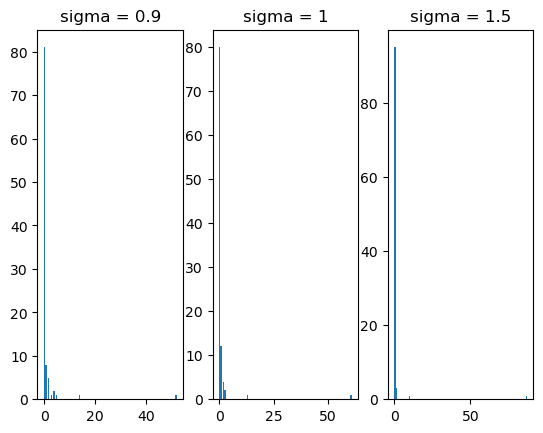

In [9]:
fig, axs= plt.subplots(1, 3)
n_bins =100
axs[0].hist(L_ans[3], bins=n_bins)
axs[0].set_title('sigma = 0.9')
axs[1].hist(L_ans[4], bins=n_bins)
axs[1].set_title('sigma = 1')
axs[2].hist(L_ans[5], bins=n_bins)
axs[2].set_title('sigma = 1.5')

Text(0.5, 1.0, 'sigma = 8')

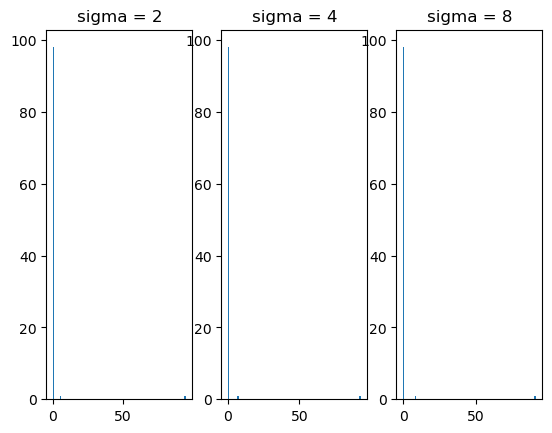

In [10]:
fig, axs= plt.subplots(1, 3)
n_bins =100
axs[0].hist(L_ans[6], bins=n_bins)
axs[0].set_title('sigma = 2')
axs[1].hist(L_ans[7], bins=n_bins)
axs[1].set_title('sigma = 4')
axs[2].hist(L_ans[8], bins=n_bins)
axs[2].set_title('sigma = 8')